# <span style="color:#0b486b">  FIT3181/5215: Deep Learning (2025)</span>
***
*CE/Lecturer (Clayton):*  **Dr Trung Le** | trunglm@monash.edu <br/>
*Lecturer (Clayton):* **A/Prof Zongyuan Ge** | zongyuan.ge@monash.edu <br/>
*Lecturer (Malaysia):*  **Dr Arghya Pal** | arghya.pal@monash.edu <br/>
 <br/>
*Head Tutor 3181:*  **Ms Ruda Nie H** |  \[RudaNie.H@monash.edu \] <br/>
*Head Tutor 5215:*  **Ms Leila Mahmoodi** |  \[leila.mahmoodi@monash.edu \]

<br/> <br/>
Faculty of Information Technology, Monash University, Australia
***

# <span style="color:#0b486b">Tutorial 3a: CNN Fundamentals</span> <span style="color:red;  font-size: 18px">***** (highly important)</span> #

**The purpose of this tutorial is to demonstrate two fundamental layers in CNN, namely convolutional and max-pooling layers. The following topics will be covered:**
1. How to declare a `convolutional layer` with PyTorch and how it works
2. How to declare a `max-pooling layer` with PyTorch and how it works

*Acknowledgement: this tutorial was partly developed based non Chapter 14 materials from the book `Hands-on Machine Learning with Scikit-learn and Tensorflow (TF 2.x edition)`.*

***

## <span style="color:#0b486b">I. Preparation</span> ##

### <span style="color:#0b486b">I.1.  Setup </span> ###
We make sure the code is compatible with both Python 2 and 3. Also, we import some basic modules and do some settings for `matplotlib`.

In [ ]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [ ]:
# Plot images
def plot_image(image, scale=False, axis=False):
    if scale:
        plt.rcParams["figure.figsize"] = (image.shape[0]/50.0, image.shape[1]/50.0)
    if not axis:
        plt.axis("off")
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.show()

### <span style="color:#0b486b">I.2. Load two sample images using sklearn</span> ###
We now load two images using `sklearn`. These two images will be used in the sequel to demonstrate the effects of `convolutional` and `max pooling` layers.

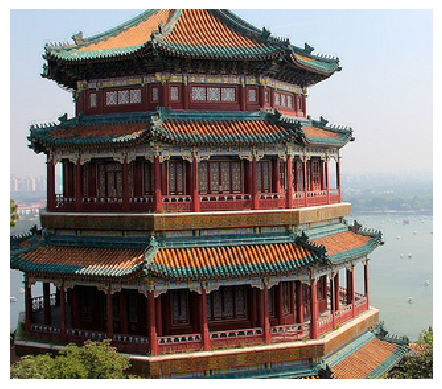

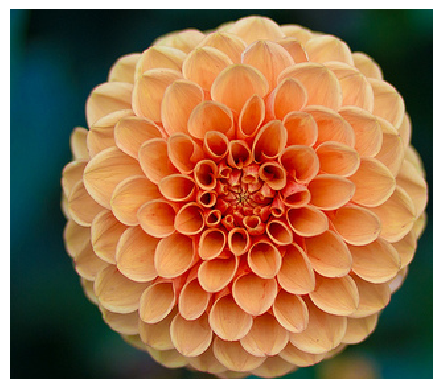

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")[80:360, 70:390]
flower = load_sample_image("flower.jpg")[80:360, 130:450]
plot_image(china)
plot_image(flower)

## <span style="color:#0b486b">II. Convolution Layer </span> ###

Load images and create a mini-batch of two images

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg")[80:360, 70:390]
flower = load_sample_image("flower.jpg")[80:360, 130:450]
batch = np.array([china, flower], dtype=np.float32)
print(batch.shape)
batch = np.transpose(batch, (0,3,1,2))
print(batch.shape)

(2, 280, 320, 3)
(2, 3, 280, 320)


In [ ]:
batch_size, channels, height, width = batch.shape
print(batch_size, channels, height, width)

2 3 280 320


Create `filters` with $fiter\_height=7, filter\_width=7, in\_channels=3, out\_channels=2$.
Our filters have two separate filters, each is a 3-D tensor of $3\times7\times7$.

With the first filter, we set all elements on the plane: $width=3$ to $1$. That is why it is a vertical plane.

With the first filter, we set all elements on the plane: $height=3$ to $1$. That is why it is a horizontal plane.

We finally declare a convolutional layer to apply this filter on a mini-batch of $2$ images.

In [ ]:
# Create 2 filters
filters = np.zeros(shape=(2, 7, 7, channels), dtype=np.float32)
filters[0, 3, :, :] = 1  # horizontal line, why?
filters[1, :, 3, :] = 1  # vertical line, why?
filters = np.transpose(filters, (0,3,1,2))
filters.shape

(2, 3, 7, 7)

We now plot the `filters`.

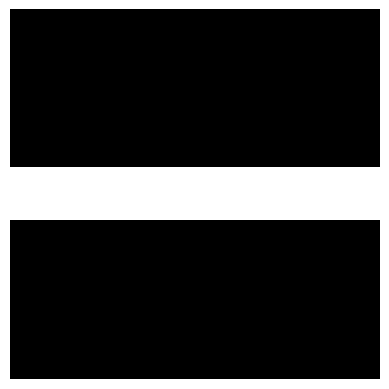

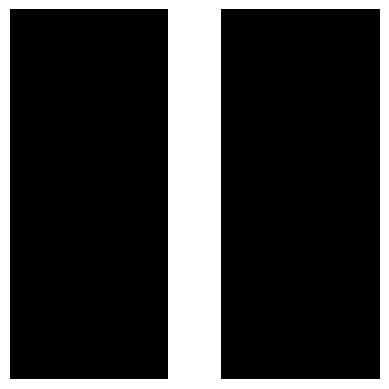

In [ ]:
plot_image(filters[0, 0, :, :])
plot_image(filters[1, 0, :, :])

Import `PyTorch
`.

In [ ]:
import torch

Use `torch.nn.functional.conv2d`

In [ ]:
batch_tensor = torch.from_numpy(batch)
filters_tensor = torch.from_numpy(filters)

Output shape:(2, 2, 140, 160)


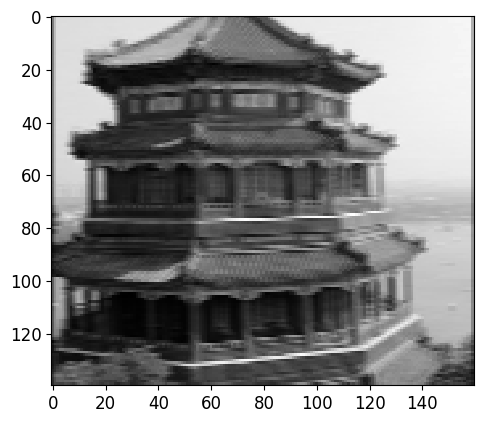

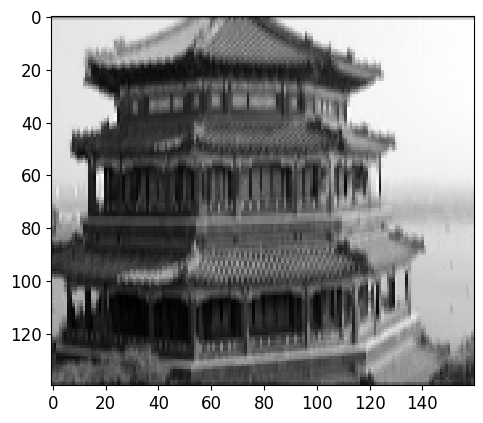

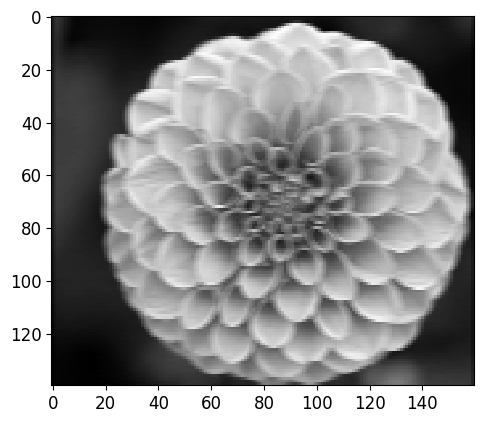

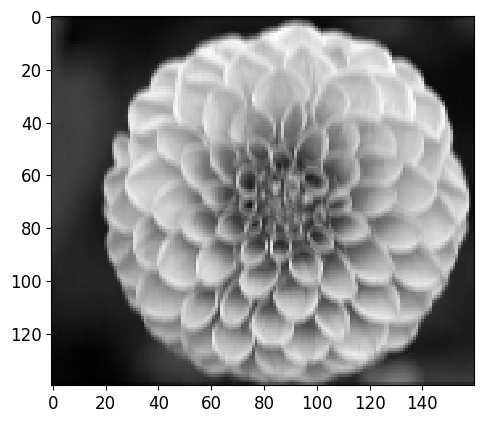

In [ ]:
output = torch.nn.functional.conv2d(input = batch_tensor, weight= filters_tensor,
                                    stride =(2,2), padding= 3) #padding means number of padding to left and right
output = output.numpy()

print("Output shape:" + str(output.shape))

plot_image(output[0, 0, :, :], axis=True) # plot 1st image's 1nd feature map, channel 0
plot_image(output[0, 1, :, :], axis=True) # plot 1st image's 2nd feature map, channel 1
plot_image(output[1, 0, :, :], axis=True) # plot 2nd image's 1nd feature map, channel 0
plot_image(output[1, 1, :, :], axis=True) # plot 2nd image's 2nd feature map, channel 1

 **<span style="color:red">Exercise 1</span>:** Explain why the output shape is $(2, 2, 140, 160)$.

In [ ]:
#Your answer here - You can use the formula in the lecture
import math

out_height = math.floor((280 + 2*3 - 7)/2) + 1
out_width = math.floor((320 + 2*3 - 7)/2) + 1
print(out_height, out_width)


140 160


## <span style="color:#0b486b">III. Pooling Layer </span>

#### <span style="color:#0b486b"> Example of `Max Pooling` </span>

(3, 280, 320)
(3, 140, 160)


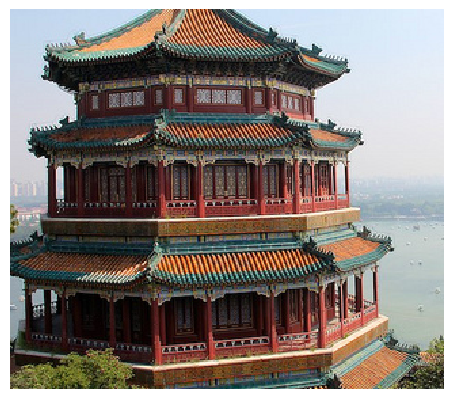

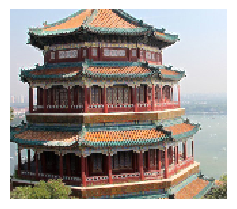

In [ ]:
output = torch.nn.functional.max_pool2d(input = batch_tensor,
                                        kernel_size=(2,2), stride= (2,2), padding =0)
output = output.numpy()
print(batch[0].shape)
print(output[0].shape)
plot_image(batch[0].transpose((1,2,0)).astype(np.int32), scale=True) # plot the 1st original image
plot_image(output[0].transpose((1,2,0)).astype(np.int32), scale=True) # plot the output for the 1st image

#### <span style="color:#0b486b"> Example of `Average Pooling` </span>

(3, 280, 320)
(3, 140, 160)


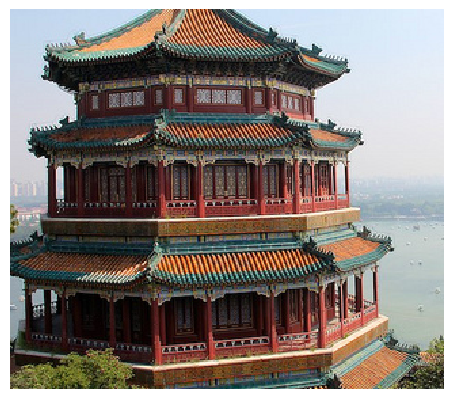

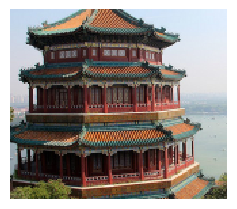

In [ ]:
output = torch.nn.functional.avg_pool2d(input = batch_tensor,
                                        kernel_size=(2,2), stride= (2,2), padding =0)
output = output.numpy()
print(batch[0].shape)
print(output[0].shape)
plot_image(batch[0].transpose((1,2,0)).astype(np.int32), scale=True) # plot the 1st original image
plot_image(output[0].transpose((1,2,0)).astype(np.int32), scale=True) # plot the output for the 1st image

## <span style="color:#0b486b">IV. Additional Reading: Effects of Convolution Operation</span>

This section aims to demonstrate the effects of convolution operation in processing images. In particular, by creating appropriate filters (kernels), we can do `blurring, sharpening, embossing, or detecting edges of images`. We first create some specific filters for those purposes.

### <span style="color:#0b486b">IV.1. Creating the effect filters (kernels) </span>

- Filter (kernel) for blurring images

In [ ]:
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

- Fiter (kernel) for sharpening images

In [ ]:
# construct a sharpening filter
sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype="int")

In [ ]:
sharpen_3D = np.stack([sharpen]*3, axis = 2)

In [ ]:
sharpen_3D.shape

(3, 3, 3)

- Laplacian kernel for detecting edge-like

In [ ]:
# construct the Laplacian kernel used to detect edge-like
# regions of an image
laplacian = np.array(([0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]), dtype="int")

In [ ]:
laplacian_3D = np.stack([laplacian]*3, axis=2)

- Sobel kernel for detecting edge-like regions along both the x and y axis, respectively

In [ ]:
# construct the Sobel x-axis kernel
sobelX = np.array(([-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]), dtype="int")

In [ ]:
sobelX_3D = np.stack([sobelX]*3, axis=2)

In [ ]:
sobelY = np.array(([-1, -2, -1],
                   [0, 0, 0],
                   [1, 2, 1]), dtype="int")

In [ ]:
sobelY_3D = np.stack([sobelY]*3, axis=2)

- Emboss kernel to emboss images

In [ ]:
# construct an emboss kernel
emboss = np.array(([-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]), dtype="int")

In [ ]:
emboss_3D = np.stack([emboss]*3, axis=2)

- Stacking the $3 \times 3$ effect filters

In [ ]:
effect_filters = np.stack([sharpen_3D, laplacian_3D, sobelX_3D, sobelY_3D, emboss_3D], axis=3)

In [ ]:
print(effect_filters.shape)

(3, 3, 3, 5)


- We transpose the `effect_filters` to `(num_filters, depth, height, width)`, convert to a torch tensor, and cast to `torch.float32`.

In [ ]:
effect_filters_tensor = torch.from_numpy(effect_filters.transpose((3,2,0,1))).type(torch.float32)
print(effect_filters_tensor.shape)

torch.Size([5, 3, 3, 3])


Load the image and convert to a torch tensor.

In [ ]:
china = load_sample_image("china.jpg")[80:360, 70:390]
china = np.array([china], dtype= np.float32)
print(china.shape)
china_tensor = torch.from_numpy(china.transpose((0,3,1,2)))
print(china_tensor.shape)

(1, 280, 320, 3)
torch.Size([1, 3, 280, 320])


### <span style="color:#0b486b"> IV.2. Applying the small blurring kernels to the China image </span>

The output image is blurred a little bit.

In [ ]:
filters = np.stack([smallBlur]*3, axis=2)
filters = np.expand_dims(filters,3)
filters = filters.transpose((3,2,0,1))
print(filters.shape)
filters_tensor = torch.from_numpy(filters)
filters_tensor = filters_tensor.type(torch.float32)

(1, 3, 7, 7)


(1, 1, 137, 157)


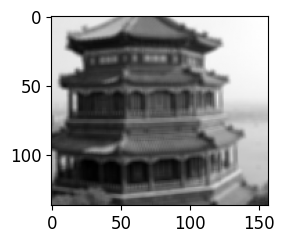

In [ ]:
output = torch.nn.functional.conv2d(input = china_tensor, weight = filters_tensor, stride = (2,2))
output = output.numpy()
print(output.shape)
plt.imshow(output[0, 0, :, :], cmap='gray')
plt.show()

### <span style="color:#0b486b"> IV.3. Applying the large blurring kernels to the China image </span>

The output image is largely blurred.

In [ ]:
filters = np.stack([largeBlur]*3, axis=2)
filters = np.expand_dims(filters,3)
print(filters.shape)
filters_tensor = torch.from_numpy(filters.transpose((3,2,0,1))).type(torch.float32)
print(filters_tensor.shape)

(21, 21, 3, 1)
torch.Size([1, 3, 21, 21])


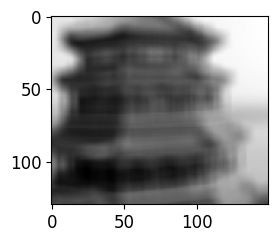

In [ ]:
output = torch.nn.functional.conv2d(input = china_tensor, weight = filters_tensor, stride = (2,2))
output = output.numpy()
output.shape
plt.imshow(output[0, 0, :, :], cmap='gray')
plt.show()

### <span style="color:#0b486b"> IV.3. Applying other filters to the China image </span>

(1, 5, 139, 159)
----------------------------------------------------------------------------------------------------
Sharpen effect


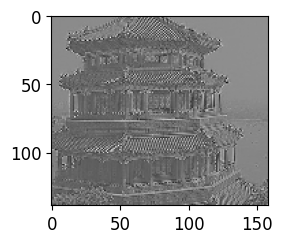

----------------------------------------------------------------------------------------------------
Lalapcian effect


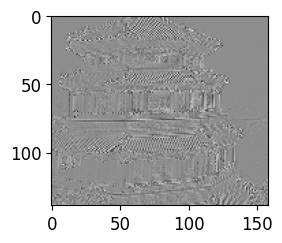

----------------------------------------------------------------------------------------------------
SobelX effect


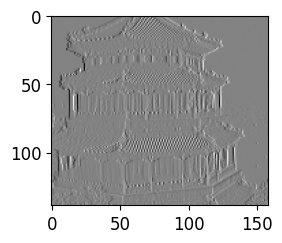

----------------------------------------------------------------------------------------------------
SobelY effect


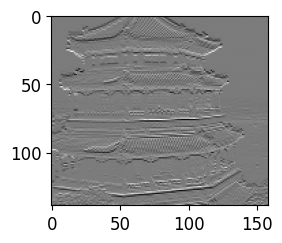

----------------------------------------------------------------------------------------------------
Emboss effect


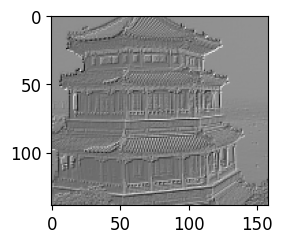

In [ ]:
output = torch.nn.functional.conv2d(input = china_tensor,
                                    weight= effect_filters_tensor, stride=(2,2))
output = output.numpy()
print(output.shape)
print("-"*100)
print("Sharpen effect")
plt.imshow(output[0, 0, :, :], cmap='gray')
plt.show()
print("-"*100)
print("Lalapcian effect")
plt.imshow(output[0, 1, :, :], cmap='gray')
plt.show()
print("-"*100)
print("SobelX effect")
plt.imshow(output[0, 2, :, :], cmap='gray')
plt.show()
print("-"*100)
print("SobelY effect")
plt.imshow(output[0, 3, :, :], cmap='gray')
plt.show()
print("-"*100)
print("Emboss effect")
plt.imshow(output[0, 4, :, :], cmap='gray')
plt.show()

---
### <span style="color:#0b486b"> <div  style="text-align:center">**THE END**</div> </span>